In [36]:
import sys
sys.path.insert(0, '../utils')

from dataPiping import *

import numpy as np
import pandas as pd

from math import sqrt
import datetime

from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [37]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [38]:
import lifelines as sa
from lifelines.utils import concordance_index, k_fold_cross_validation
from lifelines.plotting import plot_lifetimes
import patsy as pt

In [39]:
# X, y = readAggrCoxPhData(include_cens=True)
X = pd.read_pickle('../../data/aggregate/aggrFebCoxPhCensX2.pkl')
y = pd.read_pickle('../../data/aggregate/aggrFebCoxPhCensY2.pkl')


In [40]:
# X_scaled = X.copy()
# X_scaled[X.columns] = preprocessing.scale(X)
# X_scaled['observed'] = X['observed']

In [41]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [42]:
y_test_observed = X_test_sub[X_test.observed].returnTime
X_test_observed = X_test_sub[X_test.observed]

In [43]:
del X
del y

In [44]:
X_train['returnTime'] = y_train
X_test['returnTime'] = y_test

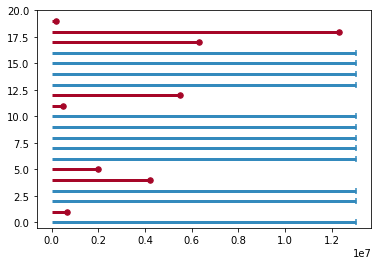

In [91]:
plot_lifetimes(X_train.tail(20).returnTime.values, event_observed=X_train.tail(20).observed.values)

In [92]:
X_train

,frequency,noSessions,prevGap,sessionAvgPrice,sessionChangeThumbnail,sessionDevice[android],sessionDevice[desktop],sessionDevice[ios],sessionDevice[mobile],sessionImageZoom,sessionNDivisions,sessionView360,sessionViewonly,sessionWatchVideo,twrt,observed,returnTime
29010,6.991984e-07,22,5.923220e+05,14.142858,0,0,1,0,0,0,2,0,7,0,4.100566e+05,True,5564929.0
13977,1.457958e-06,42,1.893432e+05,18.000000,0,0,0,1,0,0,1,0,3,0,2.985842e+05,True,565714.0
61933,4.936809e-08,1,-1.000000e+00,10.625000,0,0,1,0,0,0,2,0,5,0,-1.000000e+00,False,13042800.0
1866,2.709646e-06,83,1.643448e+05,24.000000,4,0,0,0,1,0,1,0,1,0,2.096606e+05,True,1518115.0
40132,2.004150e-06,37,1.466400e+04,36.000000,0,0,1,0,0,0,1,0,1,0,2.051169e+05,True,65071.0
62118,1.718038e-06,33,1.466733e+06,16.000000,8,0,1,0,0,0,1,0,1,0,4.560665e+05,True,2325677.0
72371,1.201032e-07,1,-1.000000e+00,63.000000,0,0,0,0,1,0,1,0,3,0,-1.000000e+00,False,13042800.0
22359,3.307505e-08,1,-1.000000e+00,11.500000,9,0,1,0,0,1,2,0,2,0,-1.000000e+00,False,13042800.0
66873,6.091550e-07,8,8.819500e+04,20.833334,2,0,1,0,0,0,1,0,3,0,4.985740e+05,True,3358.0
43928,6.271056e-06,190,1.612107e+05,47.500000,3,0,0,0,1,0,1,0,1,0,1.316401e+05,True,257109.0


In [109]:
col_subset = ['twrt','noSessions','prevGap','observed','sessionDevice[android]','sessionDevice[ios]','sessionDevice[mobile]','sessionDevice[desktop]','sessionAvgPrice','sessionViewonly','sessionWatchVideo','returnTime']
X_train_sub = X_train[col_subset]
X_test_sub = X_test[col_subset]

In [110]:
cx = sa.CoxPHFitter()
cx.fit(X_train_sub, duration_col='returnTime', event_col='observed', show_progress=True)
# cx.fit(X_train, duration_col='returnTime', show_progress=True)

Convergence completed after 2 iterations.


<lifelines.CoxPHFitter: fitted with 73472 observations, 32451 censored>

In [111]:
cx.summary

,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
twrt,0.055248,1.056803,13.264428,0.004165,0.996677,-25.948270,26.058766
noSessions,2.150234,8.586867,0.027678,77.688300,0.000000,2.095975,2.204493
prevGap,-0.049729,0.951487,0.350194,-0.142003,0.887077,-0.736248,0.636791
sessionDevice[android],-0.023836,0.976446,283.832684,-0.000084,0.999933,-556.447988,556.400315
sessionDevice[ios],0.059995,1.061831,498.128905,0.000120,0.999904,-976.469378,976.589367
sessionDevice[mobile],-0.011842,0.988228,562.553294,-0.000021,0.999983,-1102.838460,1102.814776
sessionDevice[desktop],-0.056251,0.945301,645.854730,-0.000087,0.999931,-1266.186580,1266.074077
sessionAvgPrice,0.033075,1.033628,0.045540,0.726280,0.467667,-0.056202,0.122352
sessionViewonly,0.050753,1.052063,0.055966,0.906854,0.364484,-0.058962,0.160467
sessionWatchVideo,0.021580,1.021815,0.040841,0.528400,0.597221,-0.058484,0.101645


In [96]:
X_test_observed = X_test[X_test.observed]
y_test_observed = y_test[X_test.observed]

In [115]:
y_pred = cx.predict_expectation(X_test_sub)

In [116]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
str(datetime.timedelta(seconds=rmse))

'60 days, 6:51:31.103591'

In [117]:
concordance_index(y_test, y_pred)

0.7259866460922777